In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [45]:
df = pd.read_csv('daily-min-temperatures.xls', parse_dates=['Date'])

In [46]:
df['t'] = df['Temp'].shift(1)

In [47]:
df['Resid'] = df['Temp'] - df['t']

In [48]:
df.head()

,Date,Temp,t,Resid
0,1981-01-01,20.7,NaN,NaN
1,1981-01-02,17.9,20.7,-2.8
2,1981-01-03,18.8,17.9,0.9
3,1981-01-04,14.6,18.8,-4.2
4,1981-01-05,15.8,14.6,1.2


In [49]:
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:]

In [50]:
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']

In [51]:
train, test = df.Resid[1:df.shape[0]-7], df.Resid[df.shape[0]-7:]

In [52]:
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: Resid, dtype: float64

In [53]:
train.shape

(3642,)

In [54]:
len(train)

3642

In [55]:
len(test)

7

In [56]:
model=AutoReg(train,lags=10)

In [57]:
model_fit= model.fit()

In [75]:
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [76]:
pred_resid

3643    1.296514
3644    0.519072
3645   -0.053491
3646    0.040144
3647   -0.184500
3648   -0.140112
3649         NaN
dtype: float64

In [77]:
df.t[df.shape[0]-7:]

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64

In [70]:
predictions = df.t[df.shape[0]-7:]+pred_resid

In [71]:
predictions

3643    11.296514
3644    13.419072
3645    14.546509
3646    14.040144
3647    13.415500
3648    13.359888
3649    15.582057
3650          NaN
3651          NaN
dtype: float64

In [72]:
predictions.shape

(9,)

In [73]:
test_y.shape

(7,)

In [74]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_y, predictions))
rmse

ValueError: Found input variables with inconsistent numbers of samples: [7, 9]

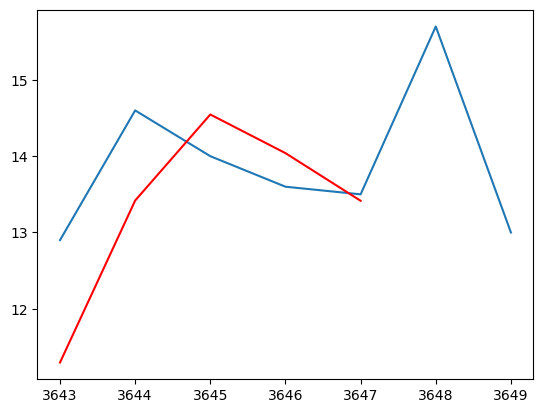

In [66]:
plt.plot(test_y)
plt.plot(predictions, color='red')